In [ ]:
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gdown
import glob, shutil, os
import yaml
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import shutil
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm



In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
print(f"cuDNN disponible: {torch.backends.cudnn.is_available()}")

cuDNN disponible: True


Creo el esquema de carpetas y el link al drive con las imagenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

datasets = [
    "https://drive.google.com/file/d/1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka/view?usp=sharing",
]

BASE_PATH = "drive/MyDrive/TPFINALCV2.0/dataset"
RAW_DATASET = f"{BASE_PATH}/dowloaded"
DST_DATASET = f"{BASE_PATH}/yolo-format"
CONVERTER_OUTPUT = f"{BASE_PATH}/bbox_check_folder"

os.makedirs(BASE_PATH, exist_ok=True)
os.makedirs(RAW_DATASET, exist_ok=True)
os.makedirs(CONVERTER_OUTPUT + "/img", exist_ok=True)
os.makedirs(CONVERTER_OUTPUT + "/labels", exist_ok=True)

Descargo las imagenes

In [ ]:
for d in datasets:
    d = d.replace("/view?usp=sharing", "")
    splitted_url = d.split("/")
    url, id, output = splitted_url[:-1], splitted_url[-1], splitted_url[-1].split("?")[0]

    if "folders" in url:
        output = f"{BASE_PATH}/{output}"
        gdown.download_folder(d, output=output, quiet=False)
    else:
        d = d.replace("file/d/", "uc?id=")
        output = f"{BASE_PATH}/{output}.zip"
        gdown.download(d, output=output, quiet=False, fuzzy=True)
        shutil.unpack_archive(output, f"{RAW_DATASET}/")


Downloading...
From (original): https://drive.google.com/uc?id=1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka
From (redirected): https://drive.google.com/uc?id=1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka&confirm=t&uuid=35e9b9fd-c76f-43d6-b46a-3dfb5edbd131
To: /content/drive/MyDrive/TPFINALCV2.0/dataset/1u7eRhAuarRWJNNMTsdRIh18fBL3Lhlka.zip

  0%|          | 0.00/4.52G [00:00<?, ?B/s]
  0%|          | 4.72M/4.52G [00:00<06:45, 11.1MB/s]
  0%|          | 17.3M/4.52G [00:00<03:39, 20.5MB/s]
  1%|          | 25.7M/4.52G [00:01<03:44, 20.0MB/s]
  1%|          | 34.1M/4.52G [00:01<03:30, 21.3MB/s]
  1%|          | 42.5M/4.52G [00:02<03:20, 22.3MB/s]
  1%|          | 50.9M/4.52G [00:02<03:15, 22.9MB/s]
  1%|▏         | 59.2M/4.52G [00:02<03:20, 22.2MB/s]
  1%|▏         | 67.6M/4.52G [00:03<03:21, 22.1MB/s]
  2%|▏         | 82.3M/4.52G [00:03<02:05, 35.3MB/s]
  2%|▏         | 88.6M/4.52G [00:03<02:34, 28.7MB/s]
  2%|▏         | 101M/4.52G [00:04<02:27, 29.9MB/s] 
  3%|▎         | 118M/4.52G [00:04<02:21, 31.2MB/s]
 

Creo el esquema de datos que va a entrenar a mi modelo

In [ ]:
yolo_ds_dirs = {
    "img_train": DST_DATASET + "/images/train/",
    "img_train_aug": DST_DATASET + "/images/augmented_train/",
    "img_val": DST_DATASET + "/images/val/",
    "lbl_train": DST_DATASET + "/labels/train/",
    "lbl_train_aug": DST_DATASET + "/labels/augmented_train/",
    "lbl_val": DST_DATASET + "/labels/val/"
}

yolo_ds_config = {
"train": "./images/train/",
"val": "./images/val/",
"nc": 51,
"names": [
    "1O", "1C", "1E", "1B",
    "2O", "2C", "2E", "2B",
    "3O", "3C", "3E", "3B",
    "4O", "4C", "4E", "4B",
    "5O", "5C", "5E", "5B",
    "6O", "6C", "6E", "6B",
    "7O", "7C", "7E", "7B",
    "8O", "8C", "8E", "8B",
    "9O", "9C", "9E", "9B",
    "10O", "10C", "10E", "10B",
    "11O", "11C", "11E", "11B",
    "12O", "12C", "12E", "12B",
    "J", "SKIP", "SSKIP"
]
}

# Crear directorios si no existen
for d in yolo_ds_dirs.values():
    os.makedirs(d, exist_ok=True)


In [ ]:
with open(f'{DST_DATASET}/data.yaml', 'w') as outfile:
    yaml.dump(yolo_ds_config, outfile, default_flow_style=False)

In [ ]:
def bnd_box_to_yolo_line(box, img_size):
    x_min, y_min, w, h = box[:4]
    x_max = x_min + w
    y_max = y_min + h

    x_center = float((x_min + x_max)) / 2 / img_size[1]
    y_center = float((y_min + y_max)) / 2 / img_size[0]

    w = float(w) / img_size[1]
    h = float(h) / img_size[0]

    return np.float64(x_center), np.float64(y_center), np.float64(w), np.float64(h)

In [ ]:
dirnames = os.listdir(RAW_DATASET)
print(f"Found { len(dirnames) } folders but working on {dirnames[0]}")

working_dir = f"{RAW_DATASET}/{dirnames[0]}"

Found 1 folders but working on ds-todas-las-cartas


Muevo y proceso las imagenes de directorio

In [ ]:
for label_file in glob.glob(f"{working_dir}/*.txt"):

    base_name = os.path.basename(label_file).split(".")[0]
    image_path = [ glob.glob(f"{working_dir}/{base_name}.{ext}") for ext in ["jpg", "png", "jpeg"] ]
    image_path = [ img[0] for img in image_path if img ]
    image_path = image_path[0] if image_path else None

    if not image_path:
        print(f"Image not found for {label_file}")

        continue

    print(f"Processing {image_path}...")
    image = cv.imread(image_path)
    image_h, image_w, _ = image.shape

    new_lines = []

    with open(label_file) as f:
        content = f.readlines()
        for line in content:
            line = line.split()
            if len(line) == 0:
                continue

            elif len(line) != 5:
                class_name = line[0]
                points = [ float(p) for p in line[1:]]
                points = np.array(points).reshape(-1,2).astype(np.float32)
                points = points * np.array([image_w, image_h])
                points = points.astype(np.int32)

                x,y,w,h = cv.boundingRect(points)

                cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv.imwrite(CONVERTER_OUTPUT + "/img/" + base_name + ".png", image)
                yolo_x, yolo_y, yolo_w, yolo_h = bnd_box_to_yolo_line([x,y,w,h], [image_h, image_w])

                new_lines.append(f"{class_name} {yolo_x} {yolo_y} {yolo_w} {yolo_h}\n")

    if new_lines:
        with open(CONVERTER_OUTPUT + "/labels/" + base_name + ".txt", "w") as f:
            f.writelines(new_lines)

Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_01.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_02.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_03.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_04.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_05.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_06.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_07.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_08.jpeg...
Processing drive/MyDrive/TPFINALCV2.0/dataset/dowloaded//ds-todas-las-cartas/03531_mirian_yañez_09.jpeg...
Processing drive/MyDrive/TPF

In [ ]:
train_files = glob.glob(f"{CONVERTER_OUTPUT}/labels/*.txt")
print( f"Moving {len(train_files)} files to training set {yolo_ds_dirs['lbl_train']}")
for f in train_files:
    dest = os.path.join(yolo_ds_dirs["lbl_train"], os.path.basename(f))
    if not os.path.exists(dest):
        shutil.move(f, yolo_ds_dirs["lbl_train"])
    else:
        print(f"File {os.path.basename(f)} already exists in {yolo_ds_dirs['lbl_train']}, skipping.")

Moving 813 files to training set drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/
File 070d392d14a7cea469fee82f0754a289.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 0a1343bac8cb2b14b120bc01bff80676.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 0fb5c9753bb52557372074f5f39c4a3d.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 10d2680f1d5794a1f9eb029351d4d59f.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 114a4ab5c3363398cd16a4df0aea9cdb.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 12351_max_eder_01.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 12351_max_eder_02.txt already exists in drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/train/, skipping.
File 12351_m

In [ ]:
# Obtener archivos de etiquetas
label_files = glob.glob(f"{CONVERTER_OUTPUT}/labels/*.txt")

val_files = set( random.choices( label_files, k=int(len(label_files)*0.20) ) )
print( f"Moving {len(val_files)} files to validation set {yolo_ds_dirs['lbl_val']}")

for f in val_files:
    shutil.move(f, yolo_ds_dirs["lbl_val"])

Moving 151 files to validation set drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/labels/val/


In [ ]:
for f_name in  glob.glob(f"{yolo_ds_dirs['lbl_val']}/*.txt"):
    base_name = os.path.basename(f_name).split(".")[0]
    img_name = glob.glob(f'{CONVERTER_OUTPUT}/img/{base_name}.*')
    if img_name:
        img_name = img_name[0]
        print(f"Moving {img_name} to {yolo_ds_dirs['img_val']}")
        shutil.move(img_name, yolo_ds_dirs["img_val"])
    else:
        continue

for f_name in glob.glob(f"{yolo_ds_dirs['lbl_train']}/*.txt"):
    base_name = os.path.basename(f_name).split(".")[0]
    img_name = glob.glob(f'{CONVERTER_OUTPUT}/img/{base_name}.*')
    if img_name:
        img_name = img_name[0]
        print(f"Moving {img_name} to {yolo_ds_dirs['img_train']}")
        shutil.move(img_name, yolo_ds_dirs["img_train"])
    else:
        continue

Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/12351_max_eder_09.png to drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/images/val/
Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/12351_max_eder_10.png to drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/images/val/
Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/12351_max_eder_16.png to drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/images/val/
Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/12351_max_eder_22.png to drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/images/val/
Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/17211af4d041d345cb72fbf6dd0417ba.png to drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/images/val/
Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/23451_guido_lorenzettibruera_07.png to drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/images/val/
Moving drive/MyDrive/TPFINALCV2.0/dataset/bbox_check_folder/img/23451_guido_lorenze

In [ ]:
transformations = [
    A.Compose([
        A.Rotate(limit=45, p=1.0),
        A.Resize(640, 640)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])),

    A.Compose([
        A.MotionBlur(p=1.0),
        A.Resize(640, 640)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])),

    A.Compose([
        A.GaussNoise(p=1.0),
        A.Resize(640, 640)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])),

    A.Compose([
        A.RandomBrightnessContrast(p=1.0),
        A.Resize(640, 640)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])),

    A.Compose([
        A.HorizontalFlip(p=1.0),
        A.Resize(640, 640)
    ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
]

# Rutas a las carpetas de imágenes y etiquetas de entrenamiento
train_img_dir = yolo_ds_dirs['img_train']
train_label_dir = yolo_ds_dirs['lbl_train']
augmented_img_dir = yolo_ds_dirs['img_train_aug']
augmented_label_dir = yolo_ds_dirs['lbl_train_aug']

# Crear las carpetas de augmentación si no existen
os.makedirs(augmented_img_dir, exist_ok=True)
os.makedirs(augmented_label_dir, exist_ok=True)


In [ ]:
# Función para leer las etiquetas en formato YOLO
def read_yolo_labels(label_path):
    with open(label_path, 'r') as file:
        labels = []
        for line in file:
            labels.append([float(x) for x in line.strip().split()])
    return labels

# Función para escribir las etiquetas en formato YOLO
def write_yolo_labels(label_path, labels):
    with open(label_path, 'w') as file:
        for label in labels:
            file.write(' '.join(map(str, label)) + '\n')

In [ ]:
for img_name in tqdm(os.listdir(train_img_dir)):
    img_path = os.path.join(train_img_dir, img_name)
    label_path = os.path.join(train_label_dir, img_name.replace('.png', '.txt'))

    # Leer la imagen
    image = cv.imread(img_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    # Leer las etiquetas
    labels = read_yolo_labels(label_path)
    bboxes = [label[1:] for label in labels]
    category_ids = [int(label[0]) for label in labels]

    for i, transform in enumerate(transformations):  # Generar imágenes aumentadas con diferentes transformaciones
        try:
            # Aplicar las transformaciones
            transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
            augmented_image = transformed['image']
            augmented_bboxes = transformed['bboxes']
            augmented_category_ids = transformed['category_ids']

            # Guardar la imagen aumentada
            augmented_image = cv.cvtColor(augmented_image, cv.COLOR_RGB2BGR)
            augmented_img_path = os.path.join(augmented_img_dir, f"{os.path.splitext(img_name)[0]}_aug_{i}.png")
            cv.imwrite(augmented_img_path, augmented_image)

            # Guardar las etiquetas aumentadas
            augmented_labels = [[augmented_category_ids[j]] + list(augmented_bboxes[j]) for j in range(len(augmented_bboxes))]
            augmented_label_path = os.path.join(augmented_label_dir, f"{os.path.splitext(img_name)[0]}_aug_{i}.txt")
            write_yolo_labels(augmented_label_path, augmented_labels)
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
            continue


 64%|██████▎   | 422/662 [09:35<05:48,  1.45s/it]

Error processing d429816_cesar_donnarumma_18.png: Expected x_max for bbox (0.6955, 0.07133333333333335, 1.00025, 0.312, 14) to be in the range [0.0, 1.0], got 1.00025.
Error processing d429816_cesar_donnarumma_18.png: Expected x_max for bbox (0.6955, 0.07133333333333335, 1.00025, 0.312, 14) to be in the range [0.0, 1.0], got 1.00025.
Error processing d429816_cesar_donnarumma_18.png: Expected x_max for bbox (0.6955, 0.07133333333333335, 1.00025, 0.312, 14) to be in the range [0.0, 1.0], got 1.00025.
Error processing d429816_cesar_donnarumma_18.png: Expected x_max for bbox (0.6955, 0.07133333333333335, 1.00025, 0.312, 14) to be in the range [0.0, 1.0], got 1.00025.
Error processing d429816_cesar_donnarumma_18.png: Expected x_max for bbox (0.6955, 0.07133333333333335, 1.00025, 0.312, 14) to be in the range [0.0, 1.0], got 1.00025.



100%|██████████| 662/662 [12:01<00:00,  1.09s/it]


In [ ]:
Labels_val = len(os.listdir(yolo_ds_dirs["lbl_val"]))
Labels_train = len(os.listdir(yolo_ds_dirs["lbl_train"]))
Labels_aug = len(os.listdir(yolo_ds_dirs["lbl_train_aug"]))
Img_val = len(os.listdir(yolo_ds_dirs["img_val"]))
Img_train = len(os.listdir(yolo_ds_dirs["img_train"]))
Img_train_aug = len(os.listdir(yolo_ds_dirs["img_train_aug"]))

print(f"Val: {Labels_val} {Img_val}")
print(f"Train: {Labels_train} {Img_train}")
print(f"Train Augmented: {Labels_aug} {Img_train_aug}")

Val: 151 151
Train: 3967 3967
Train Augmented: 0 0


In [ ]:
def move_images(src_dir, dest_dir):
    for img_name in tqdm(os.listdir(src_dir)):
        src_path = os.path.join(src_dir, img_name)
        dest_path = os.path.join(dest_dir, img_name)
        shutil.move(src_path, dest_path)

# Función para mover archivos de etiquetas
def move_labels(src_dir, dest_dir):
    for lbl_name in tqdm(os.listdir(src_dir)):
        src_path = os.path.join(src_dir, lbl_name)
        dest_path = os.path.join(dest_dir, lbl_name)
        shutil.move(src_path, dest_path)


In [ ]:

# Mover imágenes aumentadas
move_images(augmented_img_dir, train_img_dir)

# Mover etiquetas aumentadas
move_labels(augmented_label_dir, train_label_dir)

print("Imágenes y etiquetas aumentadas movidas exitosamente a las carpetas de entrenamiento.")

Analizar la cantidad de clases que tengo en Train


In [ ]:
import glob
import os
from collections import Counter

# Ruta a las etiquetas YOLO
labels_dir = yolo_ds_dirs["lbl_train"]

classes_dir = "/content/drive/MyDrive/TPFINALCV2.0/dataset/yolo-format"

# Leer todas las etiquetas
label_files = glob.glob(os.path.join(labels_dir, "*.txt"))

# Inicializar un contador para las clases
class_counter = Counter()

# Contar las clases en las etiquetas
for label_file in label_files:
    with open(label_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.split()[0])
            class_counter[class_id] += 1

# Obtener las clases y ordenarlas por ID
sorted_classes = sorted(class_counter.keys())

# Crear el archivo classes.txt con las clases
classes_file = os.path.join(classes_dir, "classes.txt")
with open(classes_file, "w") as f:
    for class_id in sorted_classes:
        f.write(f"{class_id}\n")



Classes found: Counter({3: 618, 4: 605, 27: 601, 23: 594, 47: 582, 16: 581, 15: 576, 18: 576, 24: 571, 21: 570, 17: 570, 44: 564, 46: 558, 6: 558, 40: 552, 12: 552, 13: 547, 36: 546, 5: 546, 25: 546, 39: 540, 9: 540, 10: 540, 14: 535, 45: 534, 20: 534, 42: 528, 0: 521, 7: 521, 41: 520, 43: 517, 1: 516, 26: 515, 8: 510, 19: 510, 11: 504, 2: 498, 37: 481, 22: 480, 38: 420, 29: 414, 32: 408, 48: 378, 35: 372, 28: 366, 30: 365, 34: 360, 33: 360, 31: 354, 49: 72, 50: 18})
Classes file created at: /content/drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/classes.txt


In [ ]:
class_names = [
    "1O", "1C", "1E", "1B",
    "2O", "2C", "2E", "2B",
    "3O", "3C", "3E", "3B",
    "4O", "4C", "4E", "4B",
    "5O", "5C", "5E", "5B",
    "6O", "6C", "6E", "6B",
    "7O", "7C", "7E", "7B",
    "8O", "8C", "8E", "8B",
    "9O", "9C", "9E", "9B",
    "10O", "10C", "10E", "10B",
    "11O", "11C", "11E", "11B",
    "12O", "12C", "12E", "12B",
    "J", "SKIP", "SSKIP"
]

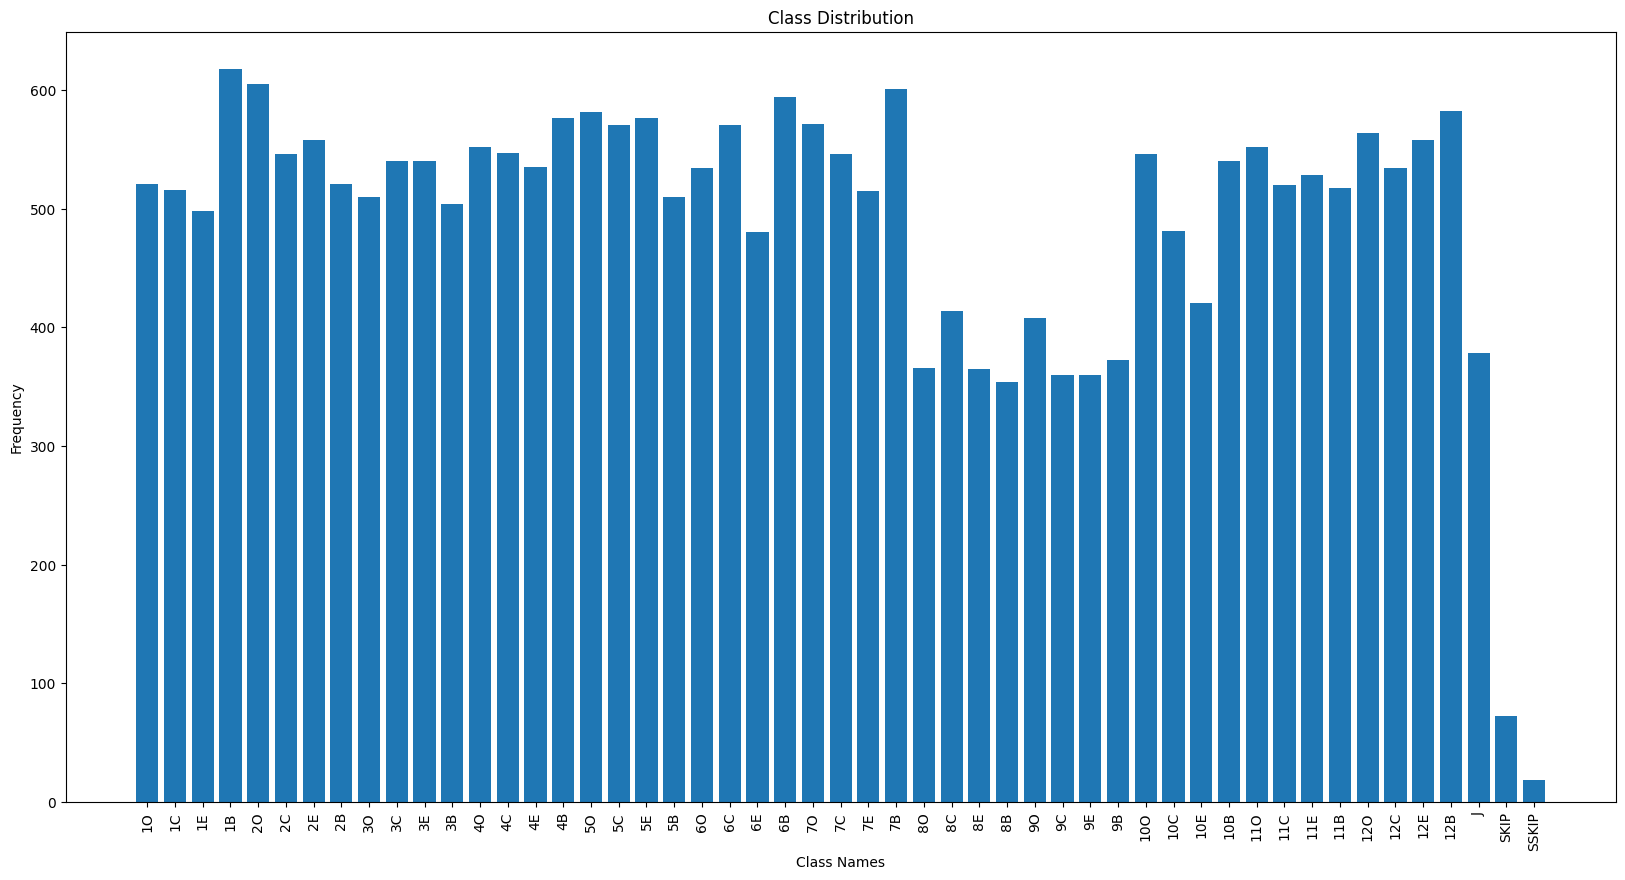

In [ ]:
mapped_classes = {name: class_counter.get(idx, 0) for idx, name in enumerate(class_names)}

# Crear el histograma
plt.figure(figsize=(20, 10))
plt.bar(mapped_classes.keys(), mapped_classes.values())
plt.xlabel('Class Names')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()

In [ ]:
total_counts = sum(class_counter.values())
average_per_class = total_counts / len(class_names)
print(f"Total de cartas detectadas: {total_counts}")
print(f"Promedio de muestras por carta: {average_per_class:.2f}")

Total de cartas detectadas: 25144
Promedio de muestras por carta: 493.02


Visualizar el dataset

In [ ]:
# Directorios de las imágenes y las etiquetas
images_dir = yolo_ds_dirs["img_train"]
labels_dir = yolo_ds_dirs["lbl_train"]
classes_path = class_names



# Función para mostrar una imagen con sus etiquetas
def visualize_image(image_path, label_path, ax):
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    height, width, _ = image.shape

    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            bbox = list(map(float, parts[1:]))

            # Convertir el formato YOLO a [top-left-x, top-left-y, width, height]
            x_center, y_center, bbox_width, bbox_height = bbox
            top_left_x = int((x_center - bbox_width / 2) * width)
            top_left_y = int((y_center - bbox_height / 2) * height)
            bbox_width = int(bbox_width * width)
            bbox_height = int(bbox_height * height)

            # Dibujar el rectángulo y el nombre de la clase
            cv.rectangle(image, (top_left_x, top_left_y), (top_left_x + bbox_width, top_left_y + bbox_height), (255, 0, 0), 2)
            cv.putText(image, class_names[class_id], (top_left_x, top_left_y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Mostrar la imagen
    ax.imshow(image)
    ax.axis('off')



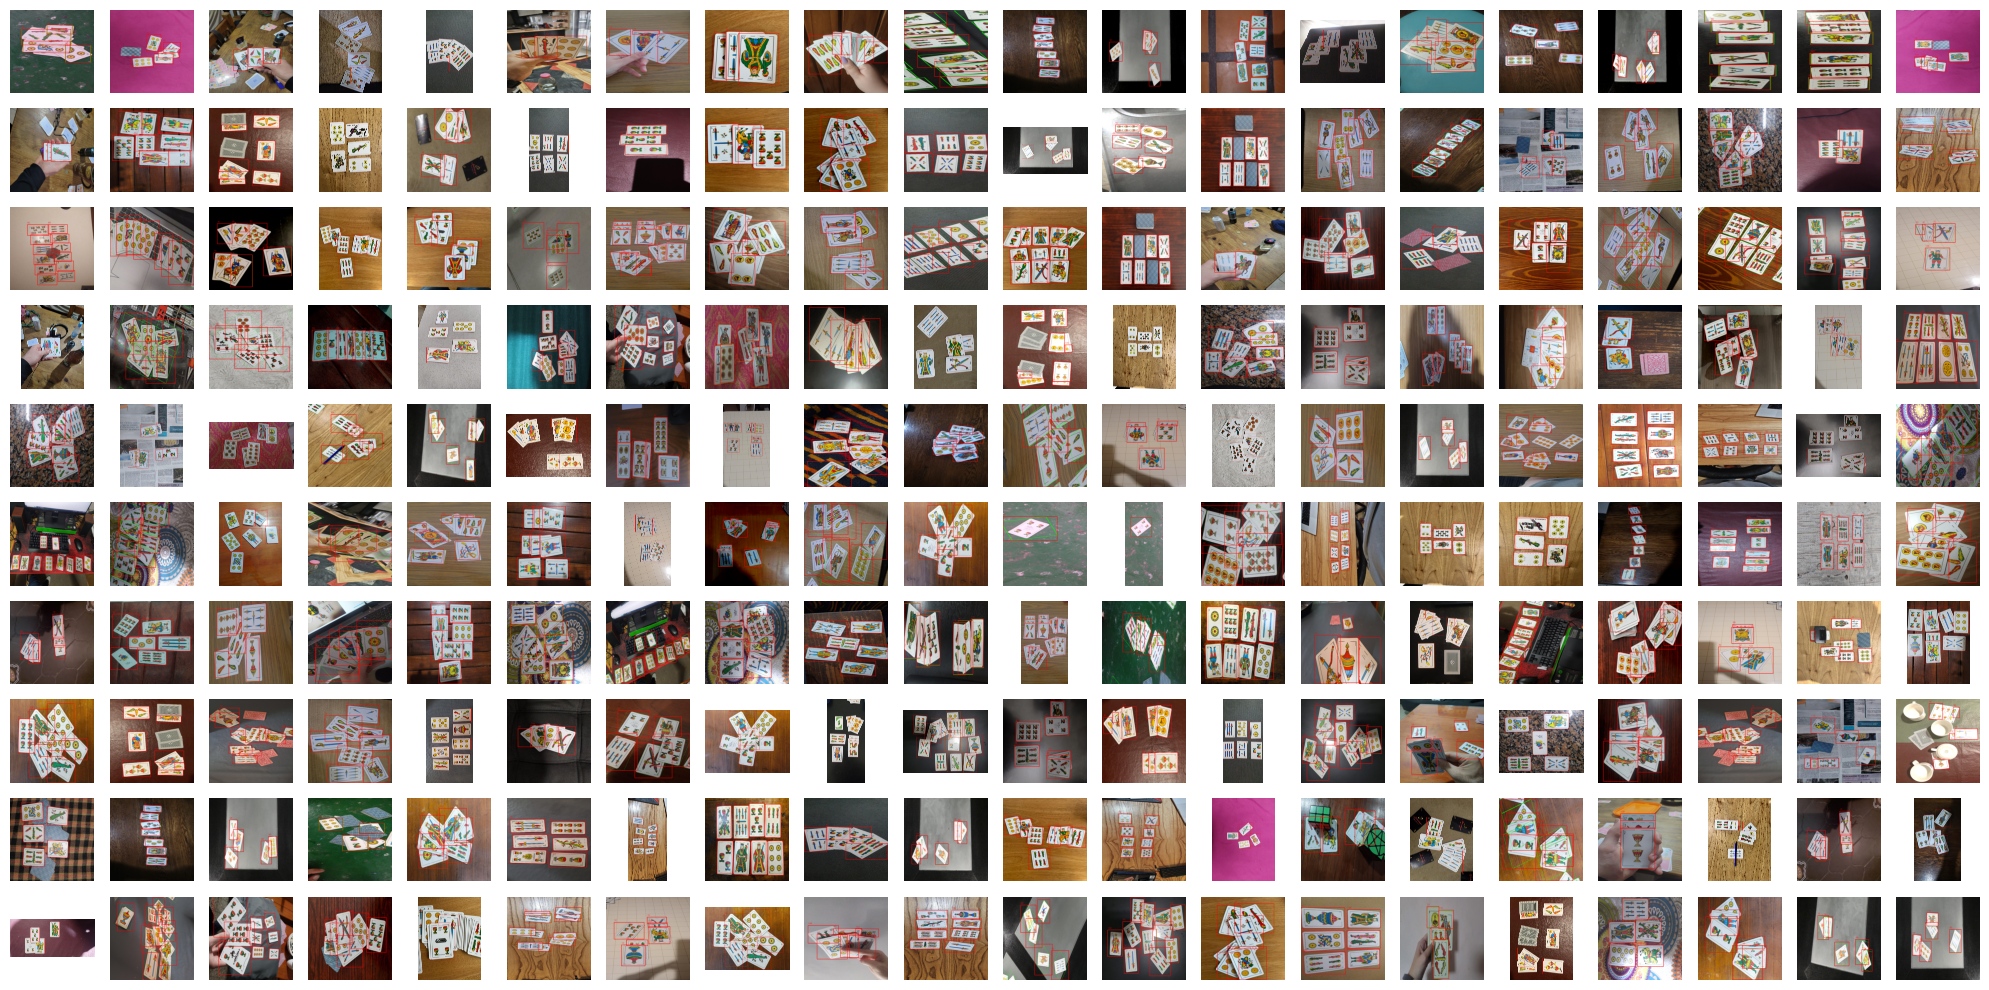

In [ ]:
# Obtener una lista de archivos de imagen y elegir 200 aleatoriamente
image_files = os.listdir(images_dir)
random.shuffle(image_files)
selected_images = image_files[:200]

# Crear una figura con un grid de 10x20
fig, axes = plt.subplots(10, 20, figsize=(20, 10))

# Iterar sobre las imágenes seleccionadas y visualizarlas
for idx, image_file in enumerate(selected_images):
    base_name = os.path.splitext(image_file)[0]
    image_path = os.path.join(images_dir, image_file)
    label_path = os.path.join(labels_dir, base_name + '.txt')

    if os.path.exists(label_path):
        ax = axes[idx // 20, idx % 20]
        visualize_image(image_path, label_path, ax)

plt.tight_layout()
plt.show()

In [ ]:
%%capture
!pip install ultralytics --upgrade

In [ ]:
%pwd

'/content'

In [ ]:
# !rm -rf /content/yolov8


In [ ]:
!mkdir -p /content/drive/MyDrive/TPFINALCV2.0/yolov8

In [ ]:
%cd /content/drive/MyDrive/TPFINALCV2.0/yolov8

/content/drive/MyDrive/TPFINALCV/yolov8


In [ ]:
yaml = "/content/drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/data.yaml"

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/TPFINALCV2.0/dataset/yolo-format/data.yaml epochs=100 batch=64


Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/TPFINALCV/dataset/yolo-format/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [ ]:
%pwd

'/content'

In [ ]:
from ultralytics import YOLO
import yaml

# Cargar el modelo preentrenado
model = YOLO('/drive/MyDrive/TPFINALCV/yolov8/yolov8n.pt')

# Leer el archivo YAML que contiene la información del entrenamiento
with open('/content/drive/MyDrive/TPFINALCV/yolov8/runs/detect/train3/args.yaml', 'r') as file:
    log_data = yaml.safe_load(file)

# Mostrar las épocas entrenadas
print("Número de épocas entrenadas:", log_data['epochs'])



100%|██████████| 6.25M/6.25M [00:00<00:00, 67.1MB/s]


Número de épocas entrenadas: 100


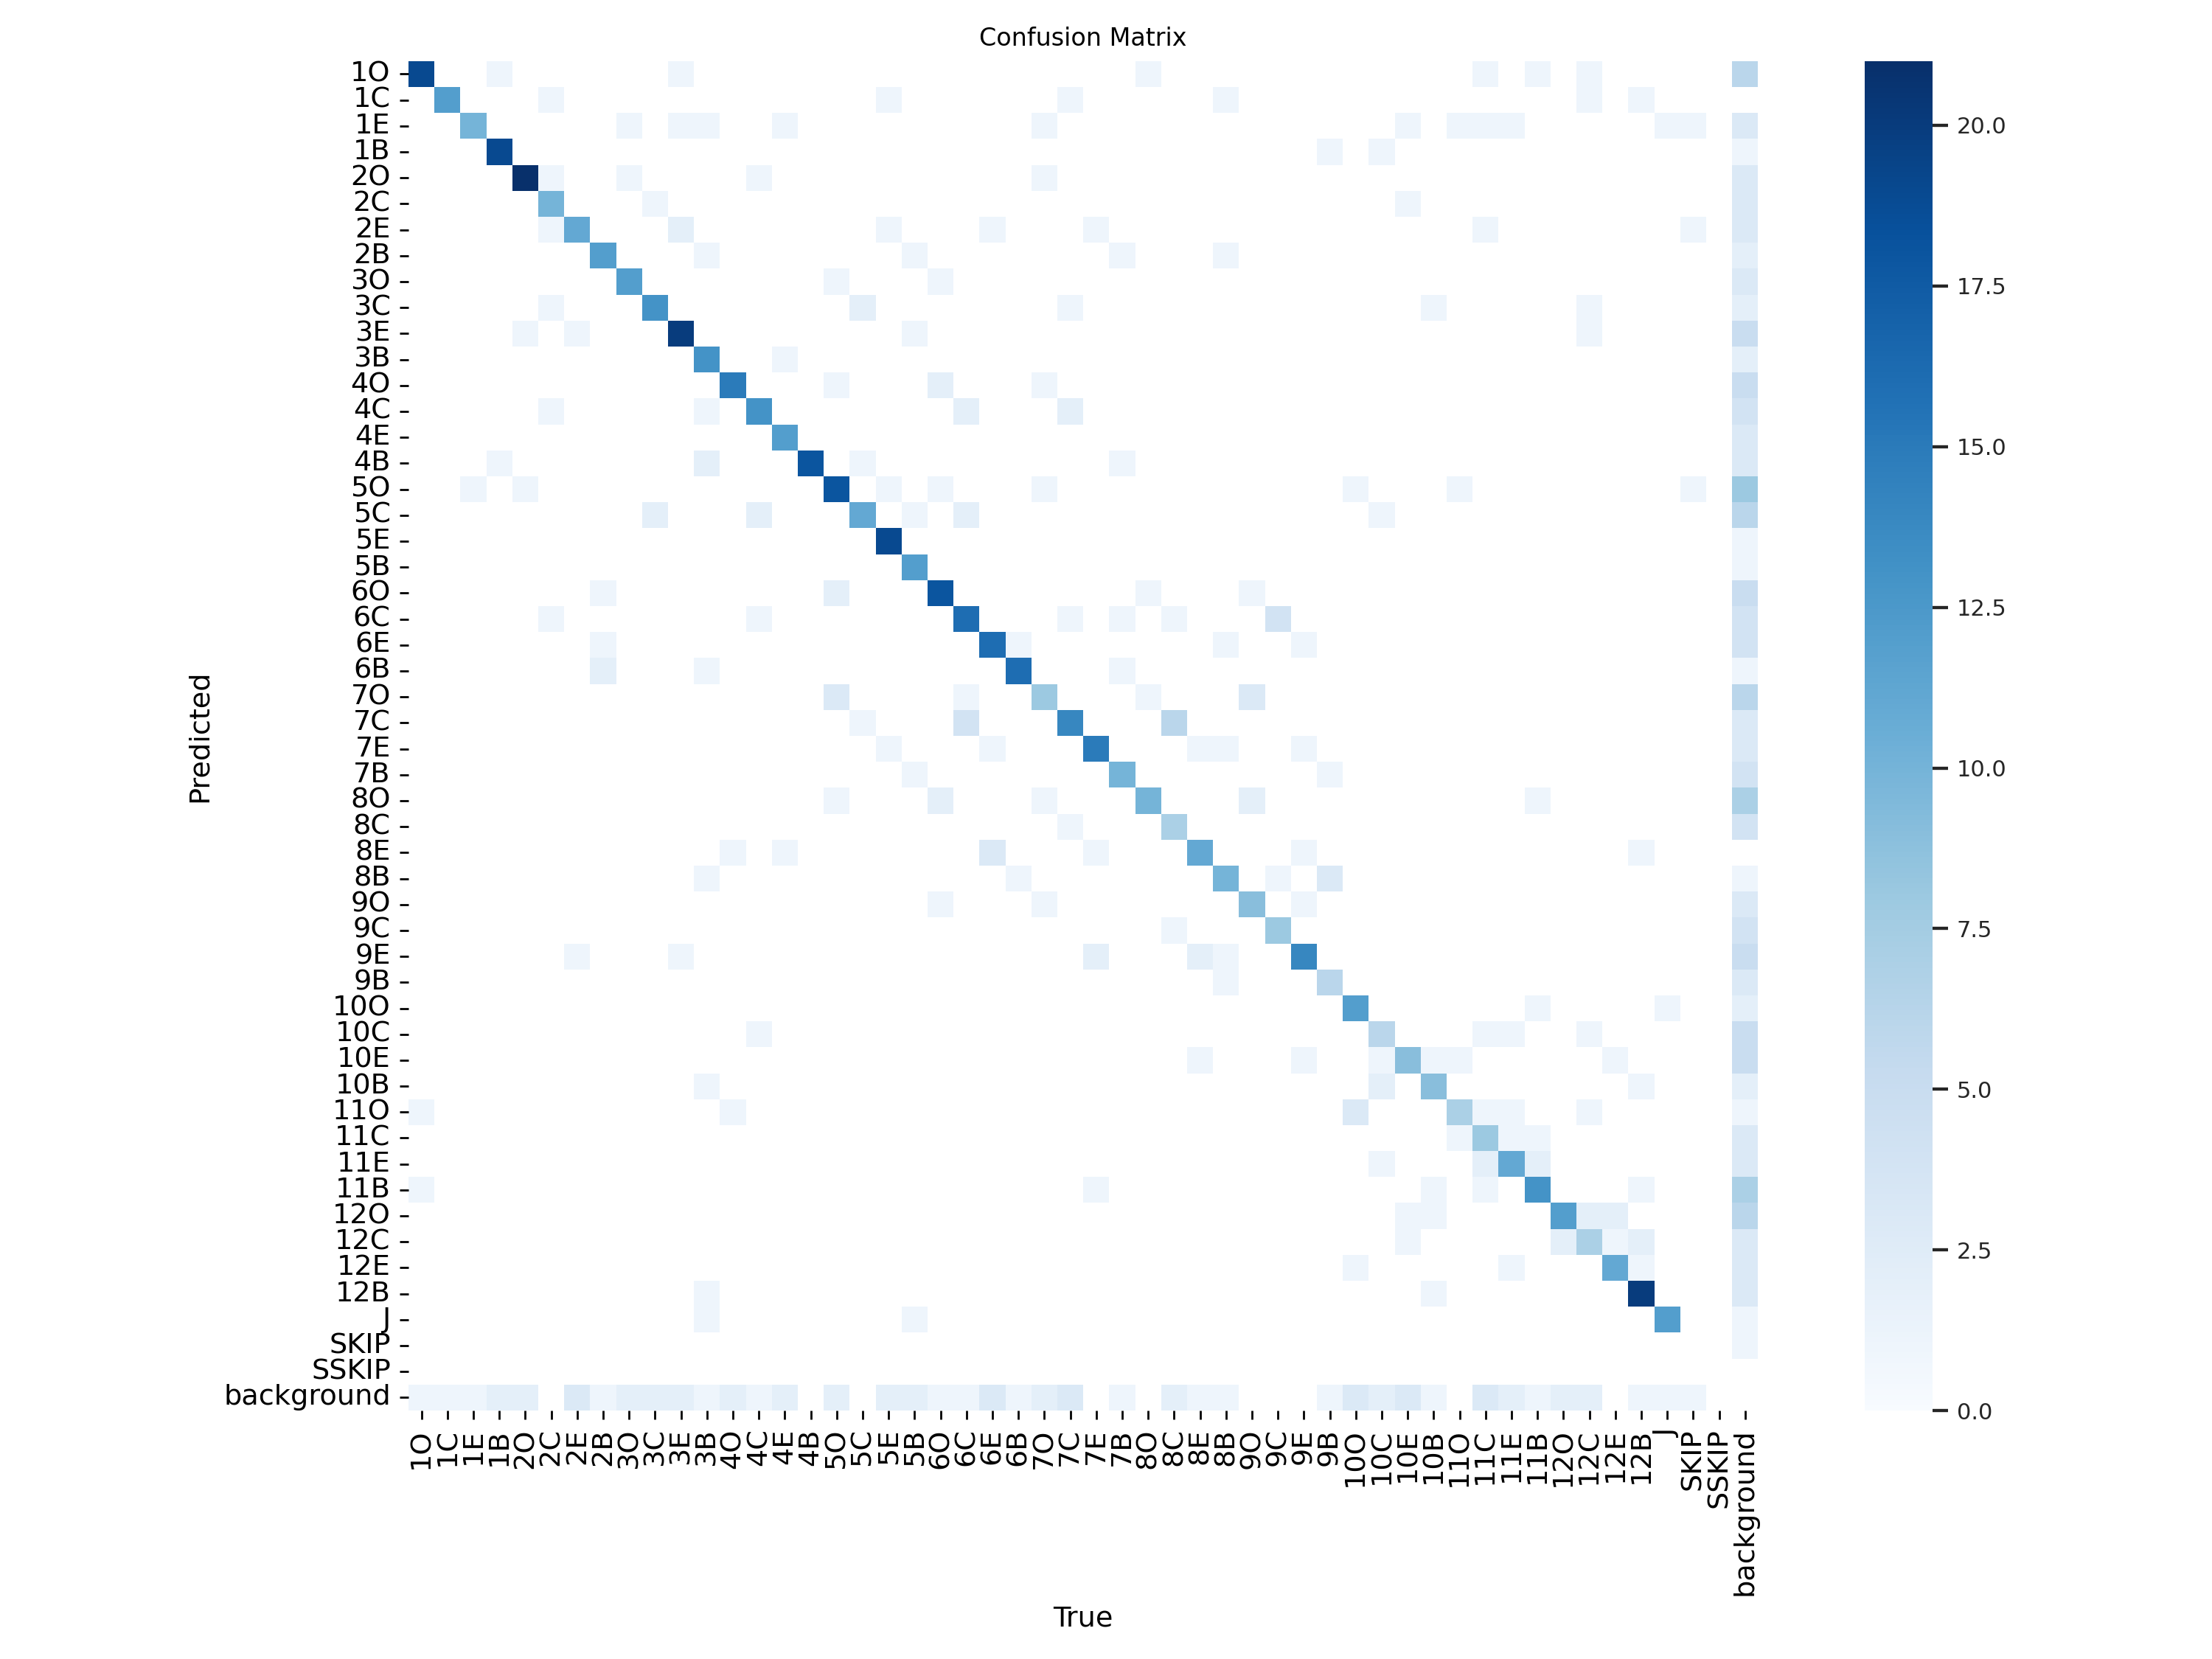

In [ ]:
train_dir = '/content/drive/MyDrive/TPFINALCV/yolov8/runs/detect/train13'

from IPython.display import Image
Image(filename=f'{train_dir}/confusion_matrix.png', width=600)

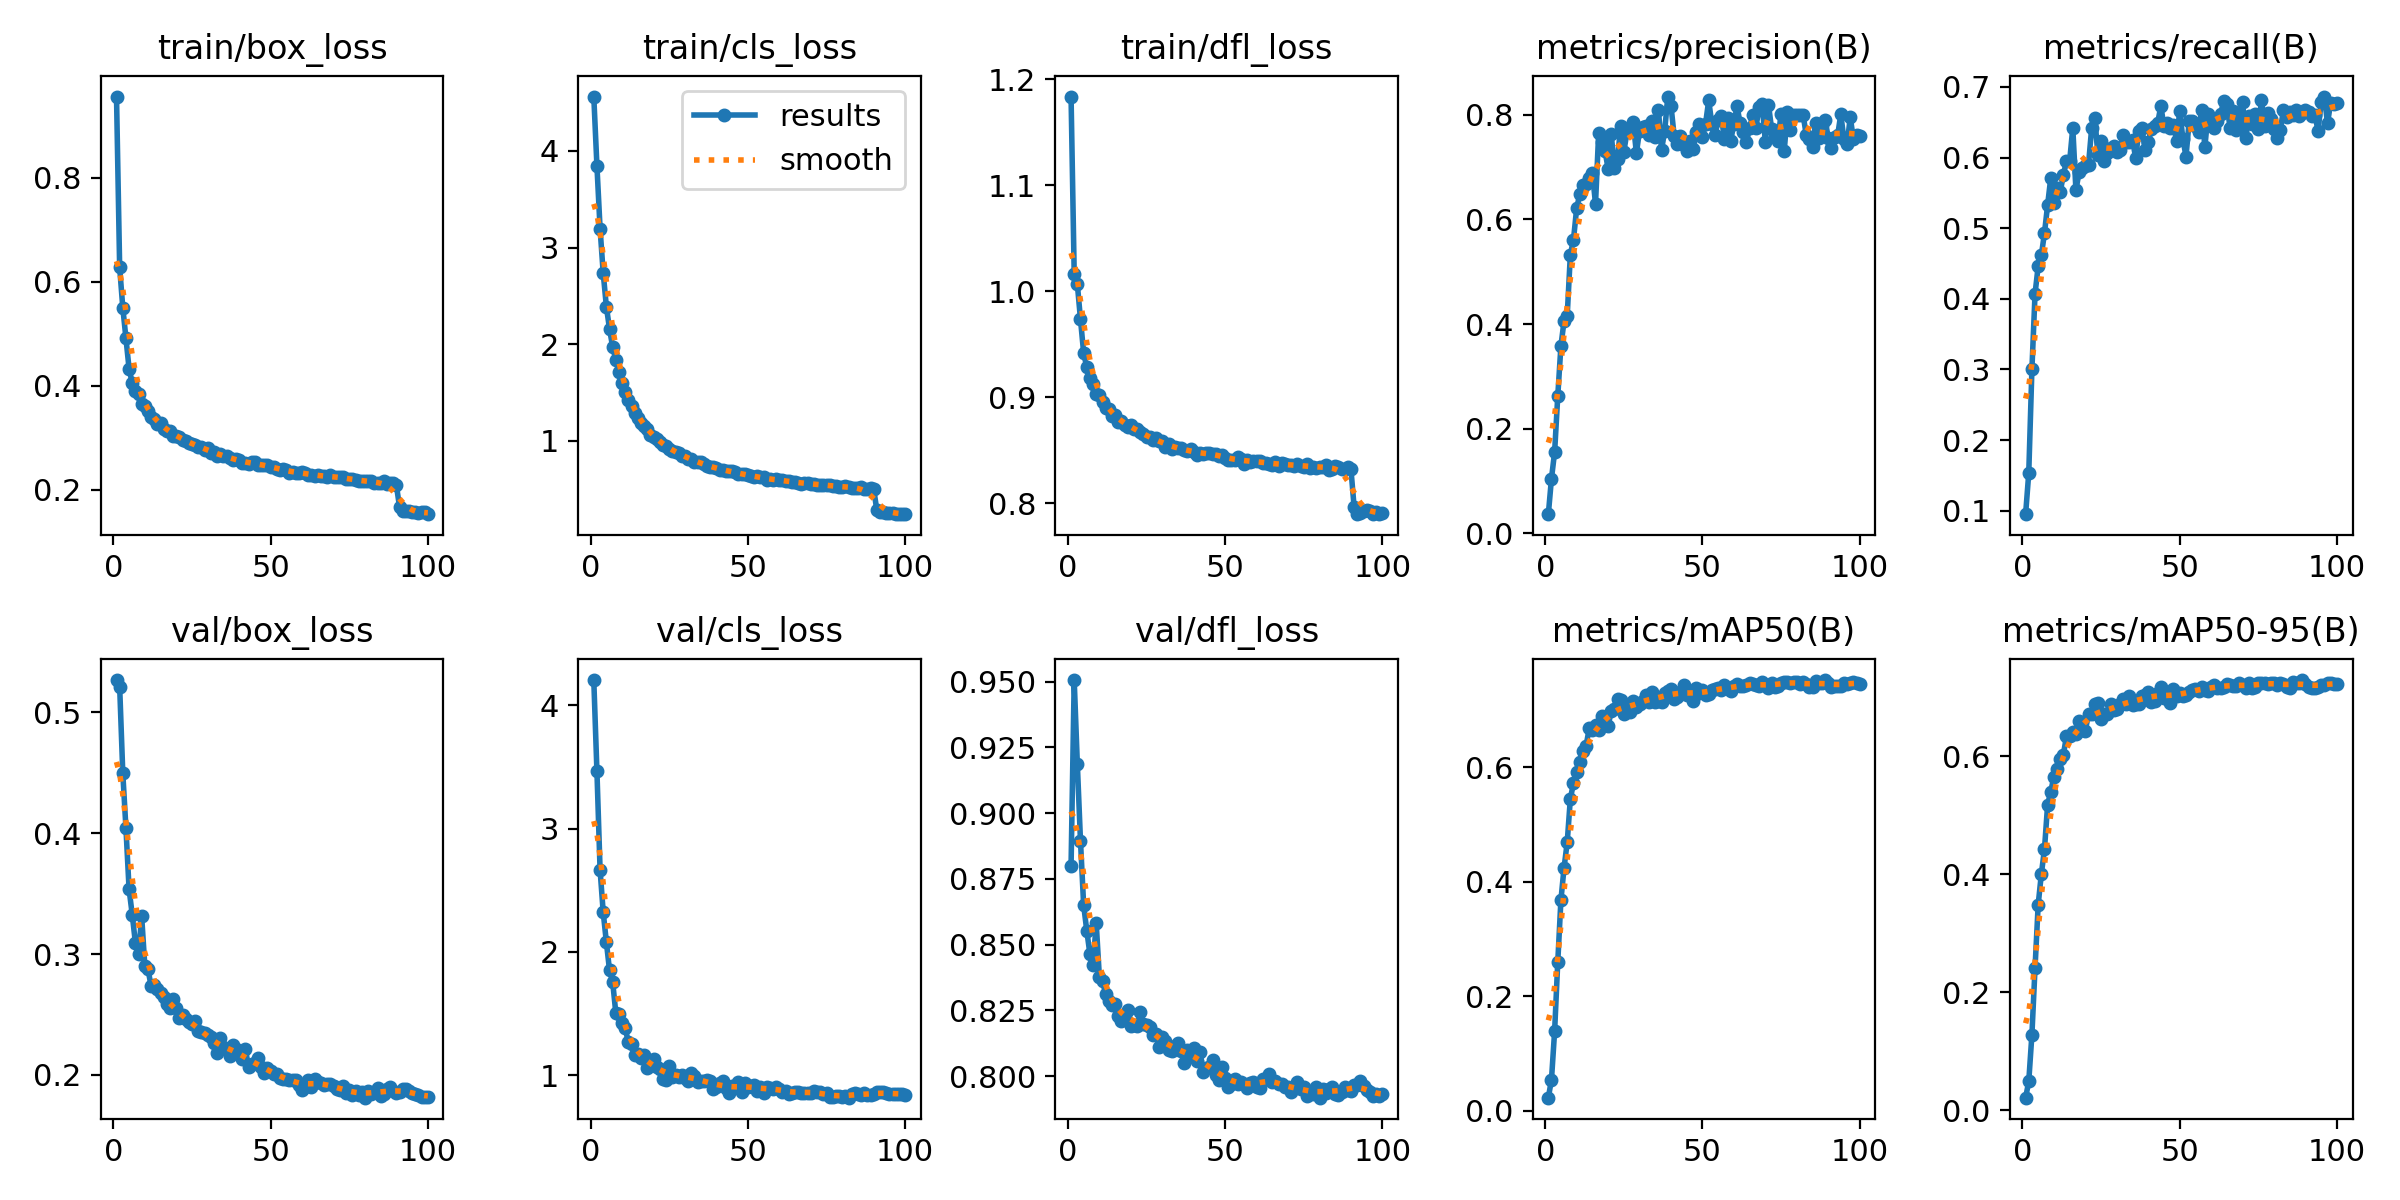

In [ ]:
from IPython.display import Image
Image(filename=f'{train_dir}/results.png', width=600)

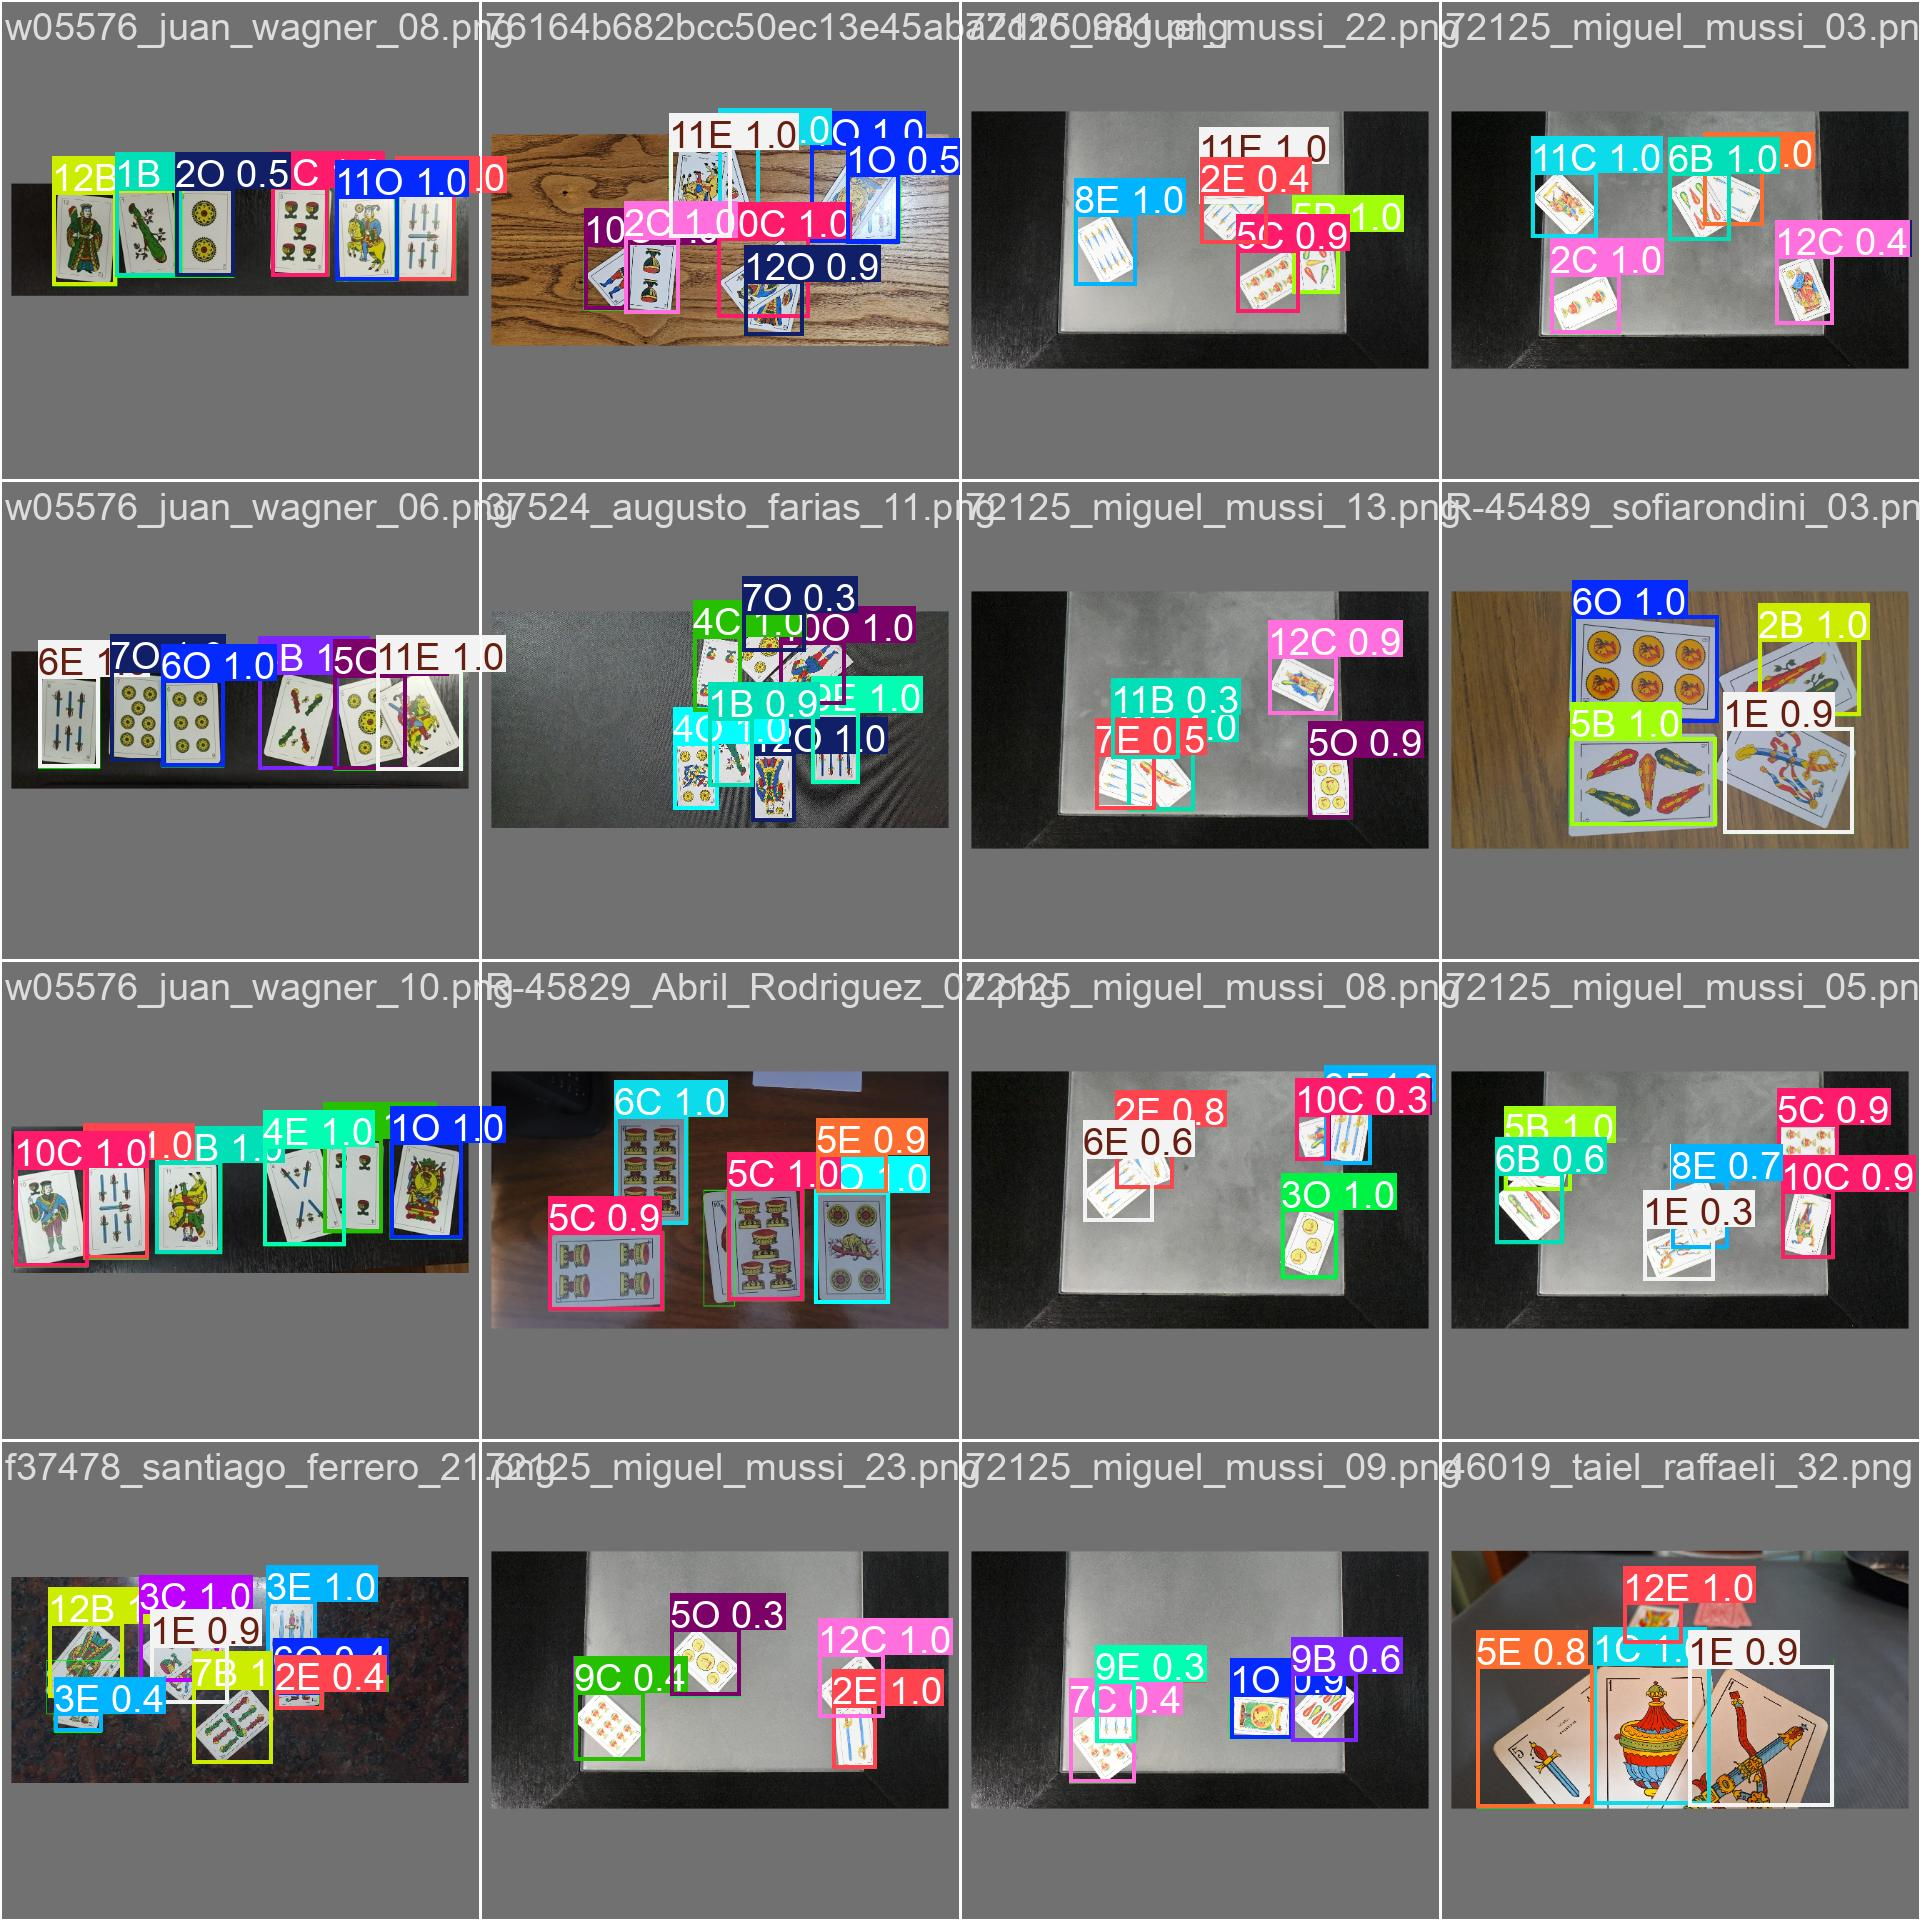

In [ ]:
Image(filename=f'{train_dir}/val_batch0_pred.jpg', width=600)

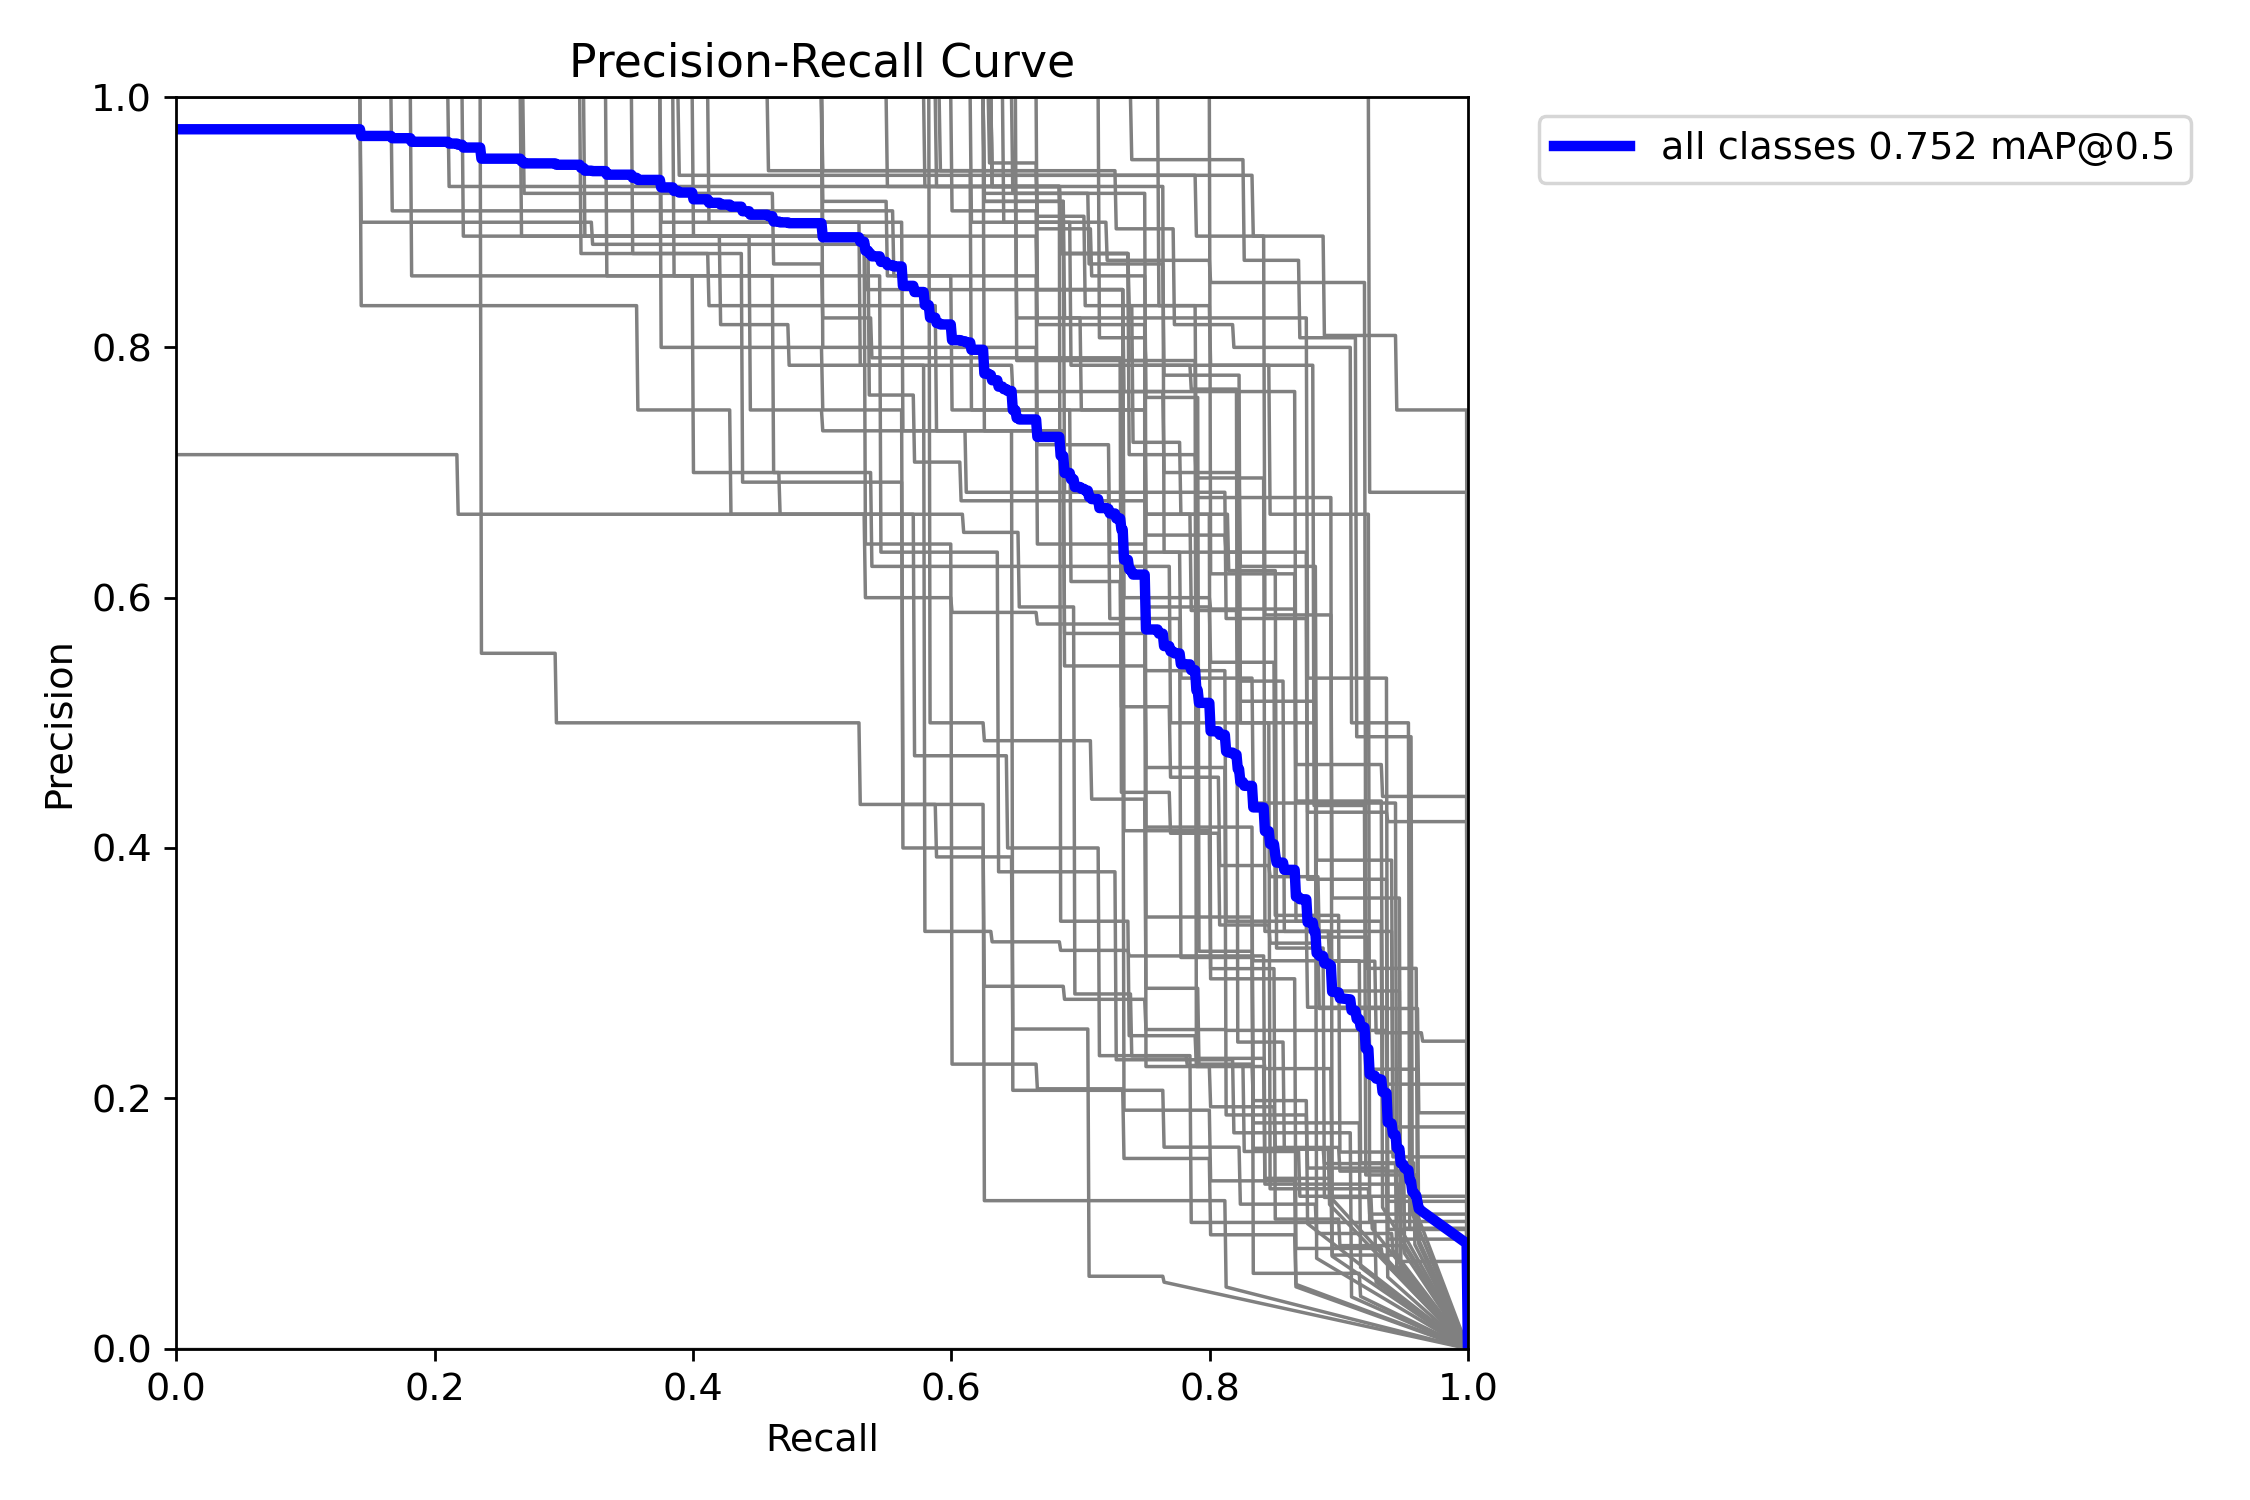

In [ ]:
Image(filename=f'{train_dir}/PR_curve.png', width=600)

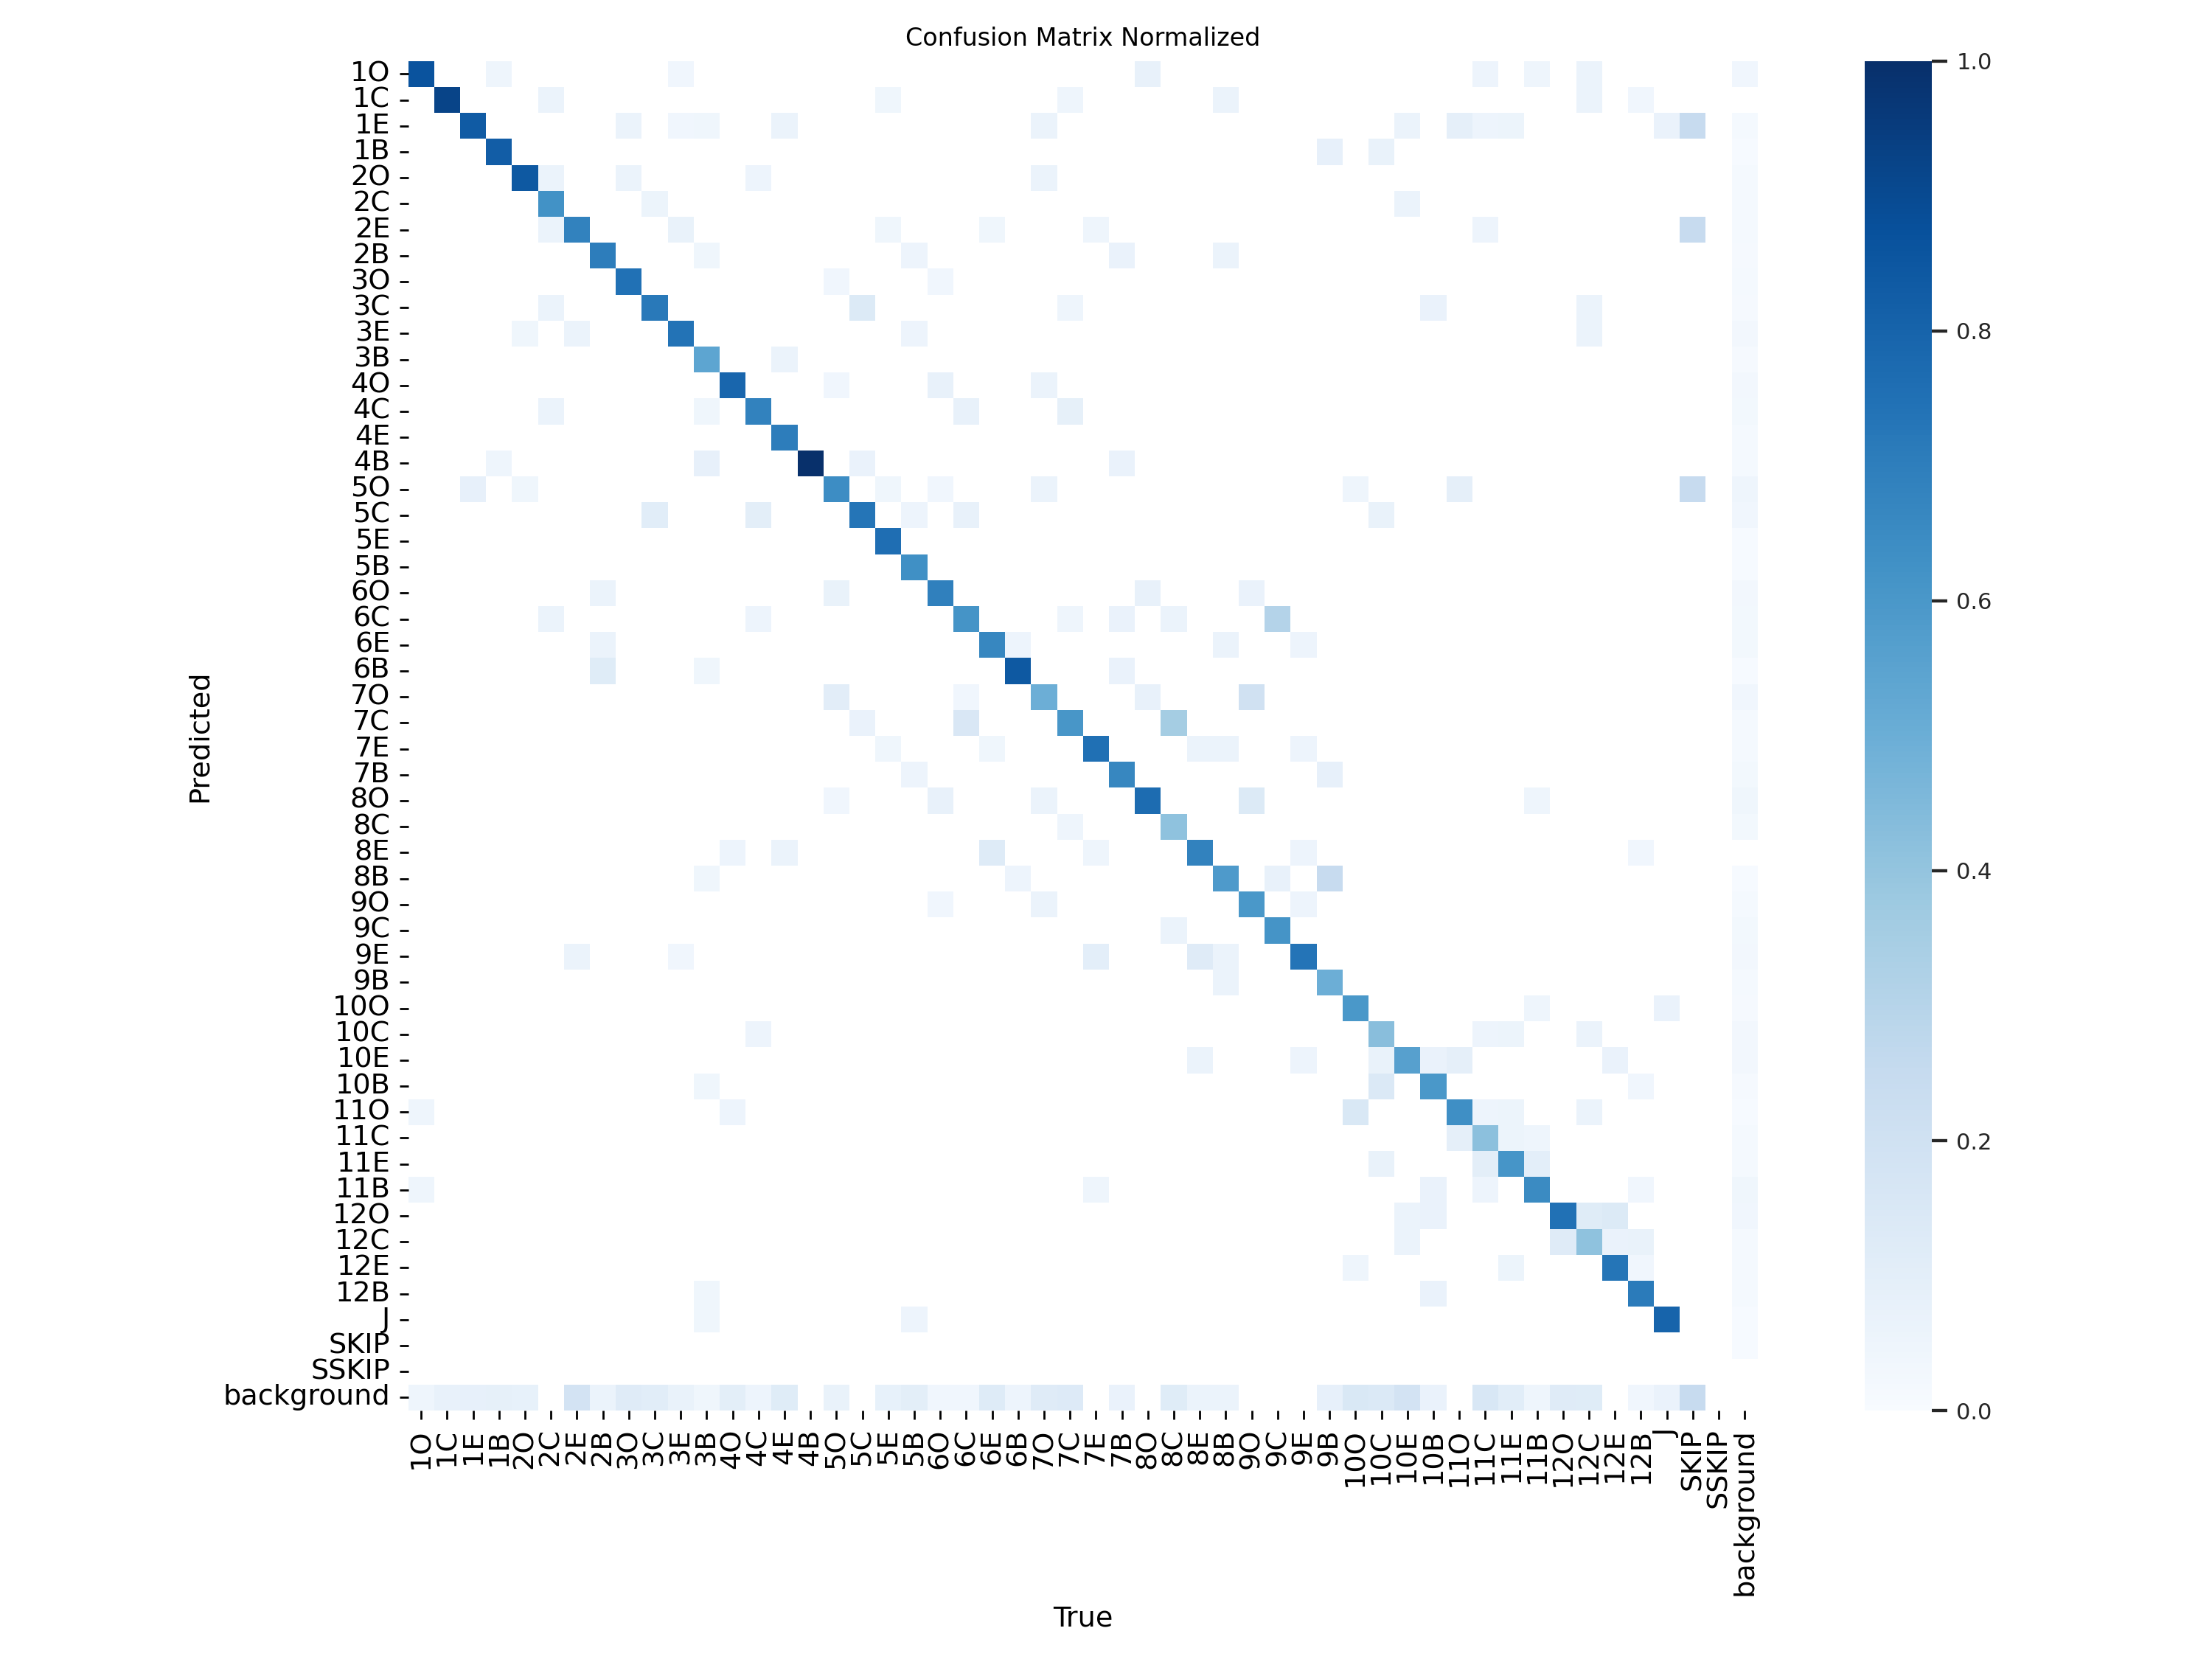

In [ ]:
Image(filename=f'{train_dir}/confusion_matrix_normalized.png', width=600)

In [ ]:
%pwd

'/content/drive/MyDrive/TPFINALCV/yolov8'

In [ ]:
model_elegido = "/content/drive/MyDrive/TPFINALCV/yolov8/runs/detect/train3/weights/best.pt"

In [ ]:
!yolo task=detect mode=val model = /content/drive/MyDrive/TPFINALCV/yolov8/runs/detect/train3/weights/best.pt data = /content/drive/MyDrive/TPFINALCV/dataset/yolo-format/data.yaml

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3015593 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 23.7MB/s]
val: Scanning /content/drive/MyDrive/TPFINALCV/dataset/yolo-format/labels/val.cache... 144 images, 0 backgrounds, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [01:35<00:00, 10.63s/it]
                   all        144        908      0.744      0.614      0.703      0.673
                    1O         22         22       0.74      0.909      0.917      0.912
                    1C         13         13      0.834          1      0.995      0.958
                    1E         12         12      0.793       0.75      0.751      0.731
                    1B         23         23      0.894      0.696      0.789      0.764
                    2O         25         25      0.881       0.92      0.